In [1]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# load the dataset
data = {
            "ds" : "./../data/raw_data/dataset.csv",
            "s_des" : "./../data/raw_data/symptom_description.csv",
            "s_pre" : "./../data/raw_data/symptom_precaution.csv",
            "s_sev" : "./../data/raw_data/symptom_severity.csv"
        }


ds = pd.read_csv(data['ds'])
s_des = pd.read_csv(data["s_des"])
s_pre = pd.read_csv(data["s_pre"])
s_sev = pd.read_csv(data["s_sev"])

print("size of ds : ",ds.shape)
print("size of s_des : ",s_des.shape)
print("size of s_pre : ",s_pre.shape)
print("size of s_sev : ",s_sev.shape)

size of ds :  (4920, 18)
size of s_des :  (41, 2)
size of s_pre :  (41, 5)
size of s_sev :  (133, 2)


# Data exploration

### dataset (ds)

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [4]:
ds.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ds['Disease'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [6]:
def cnt_plot_symptom(col):
    plt.figure(figsize=(30,17))
    plt.grid(True)
    g = sns.countplot(data=ds,x=col)
    for p in g.patches:
        txt = str(p.get_height())
        g.annotate(txt,(p.get_x()+0.01, p.get_height()))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


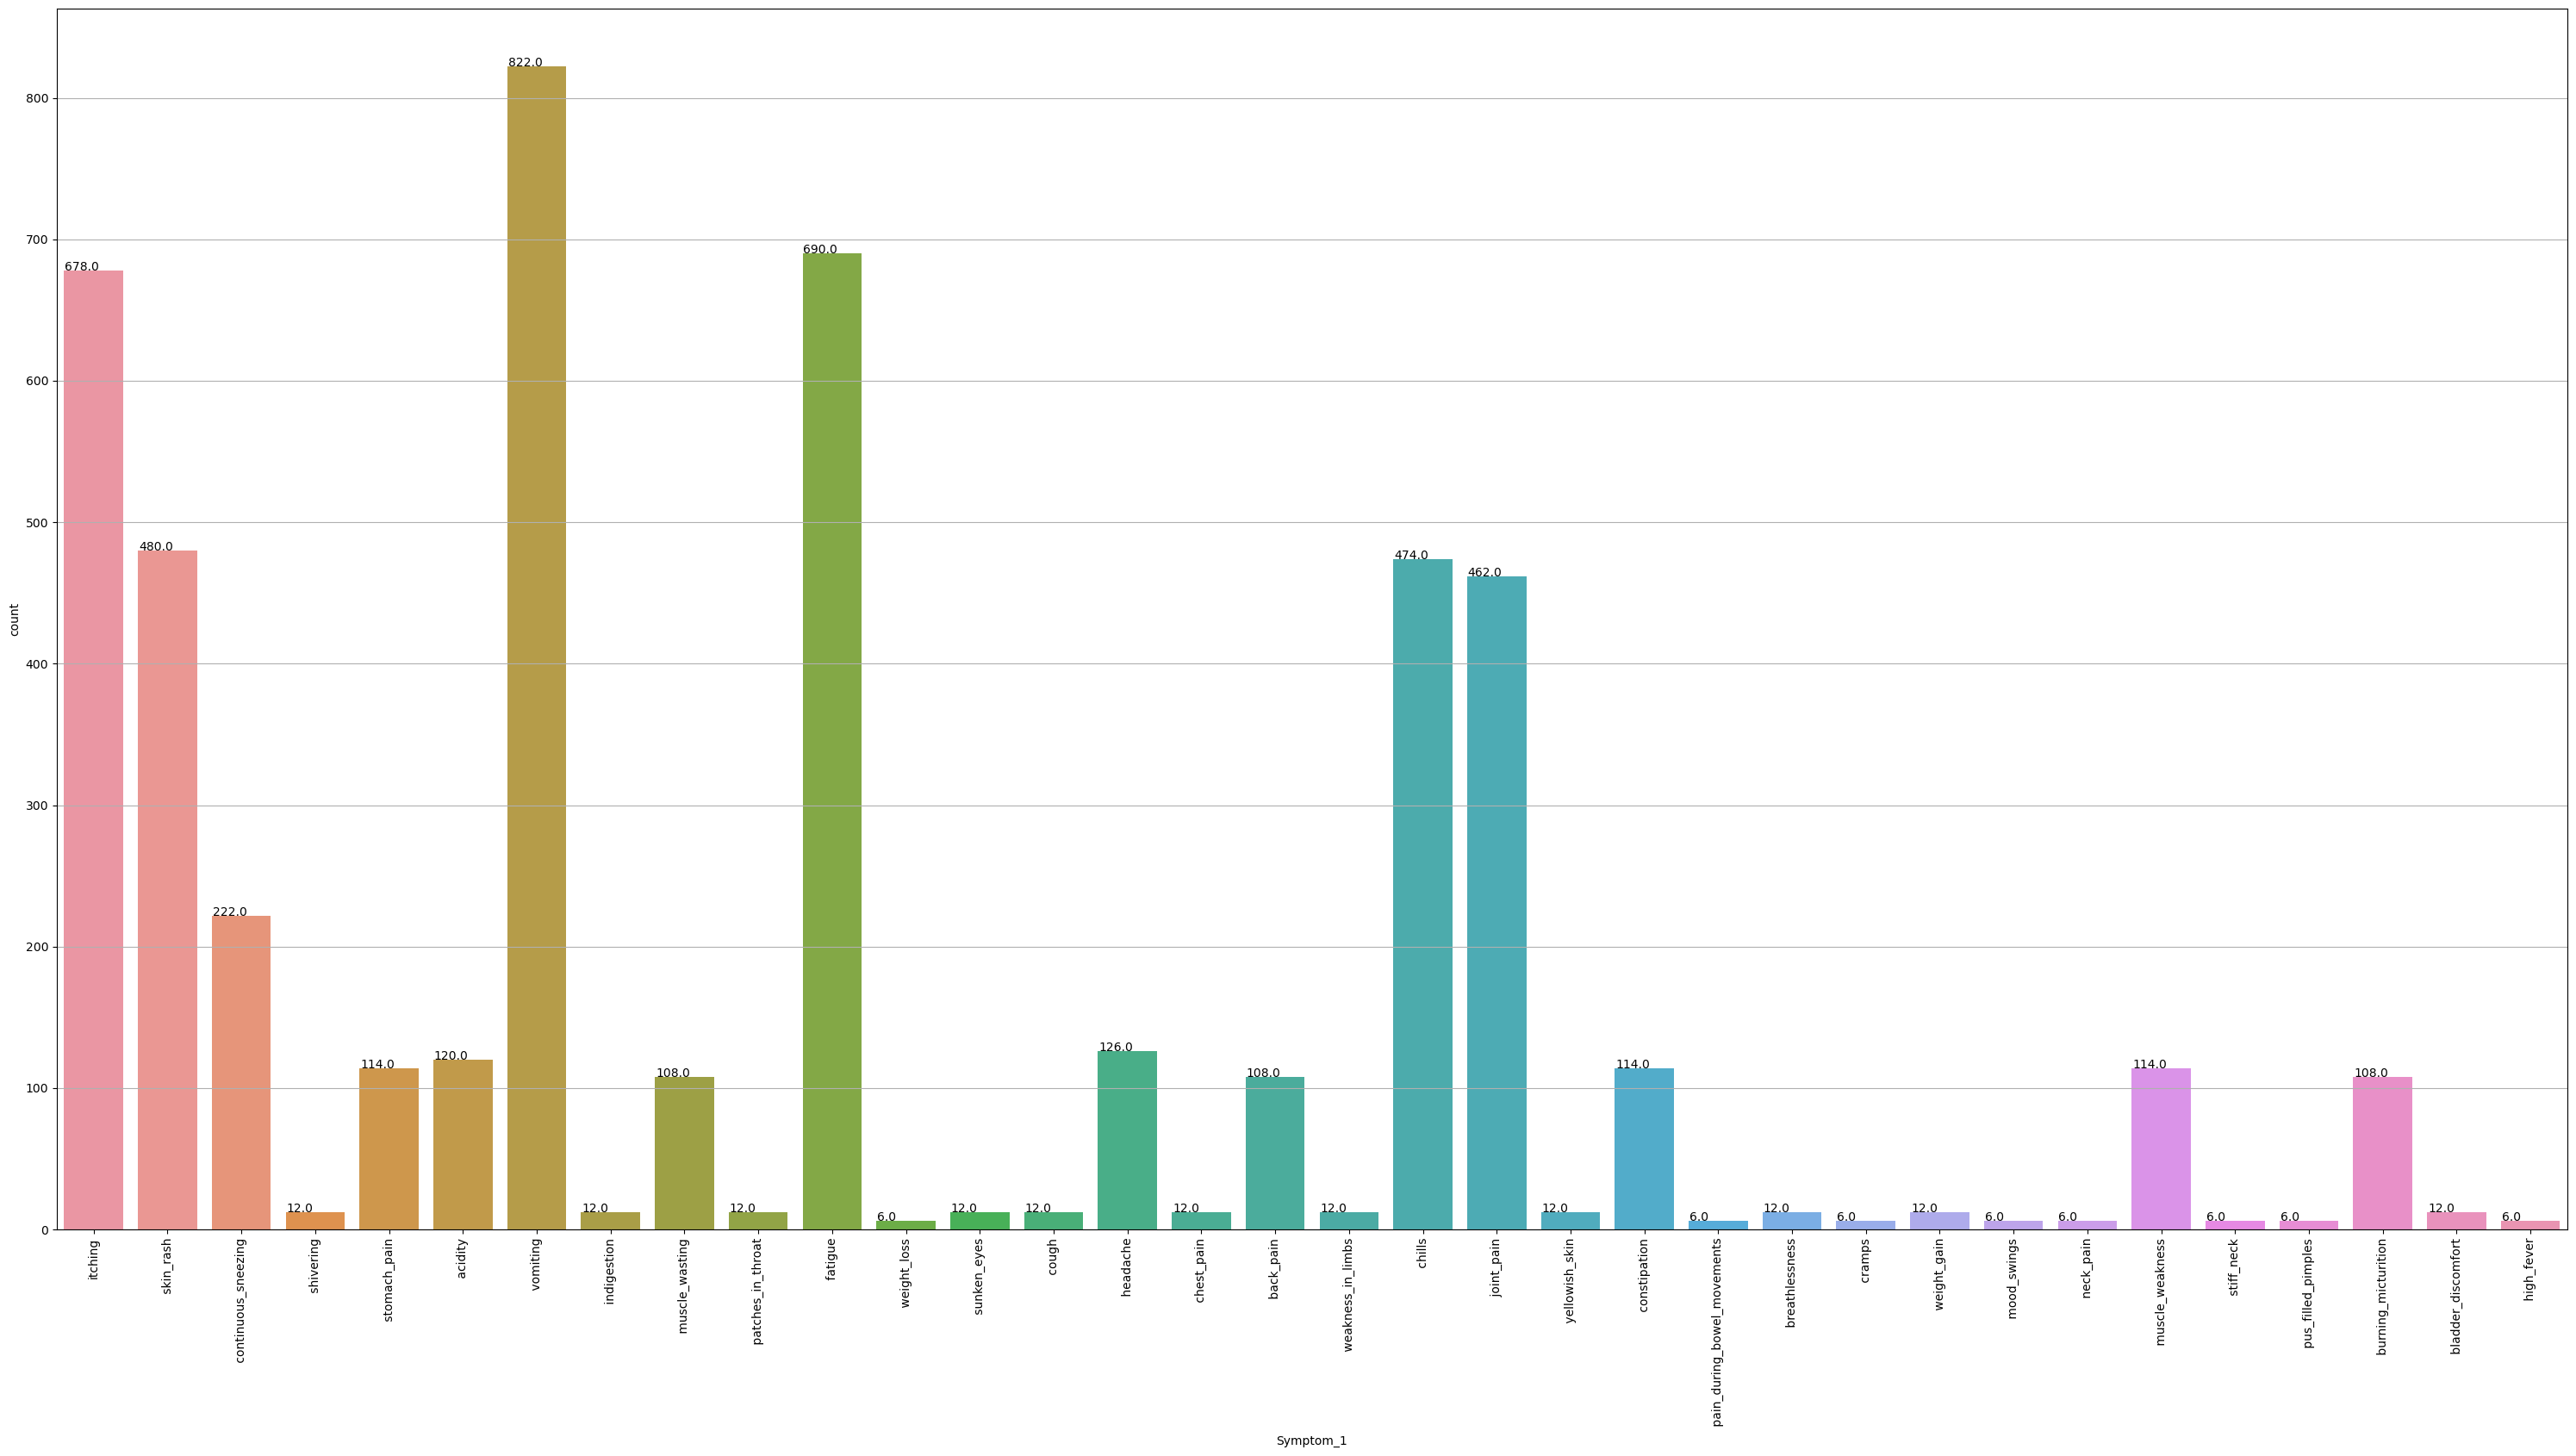

In [7]:
cnt_plot_symptom("Symptom_1")

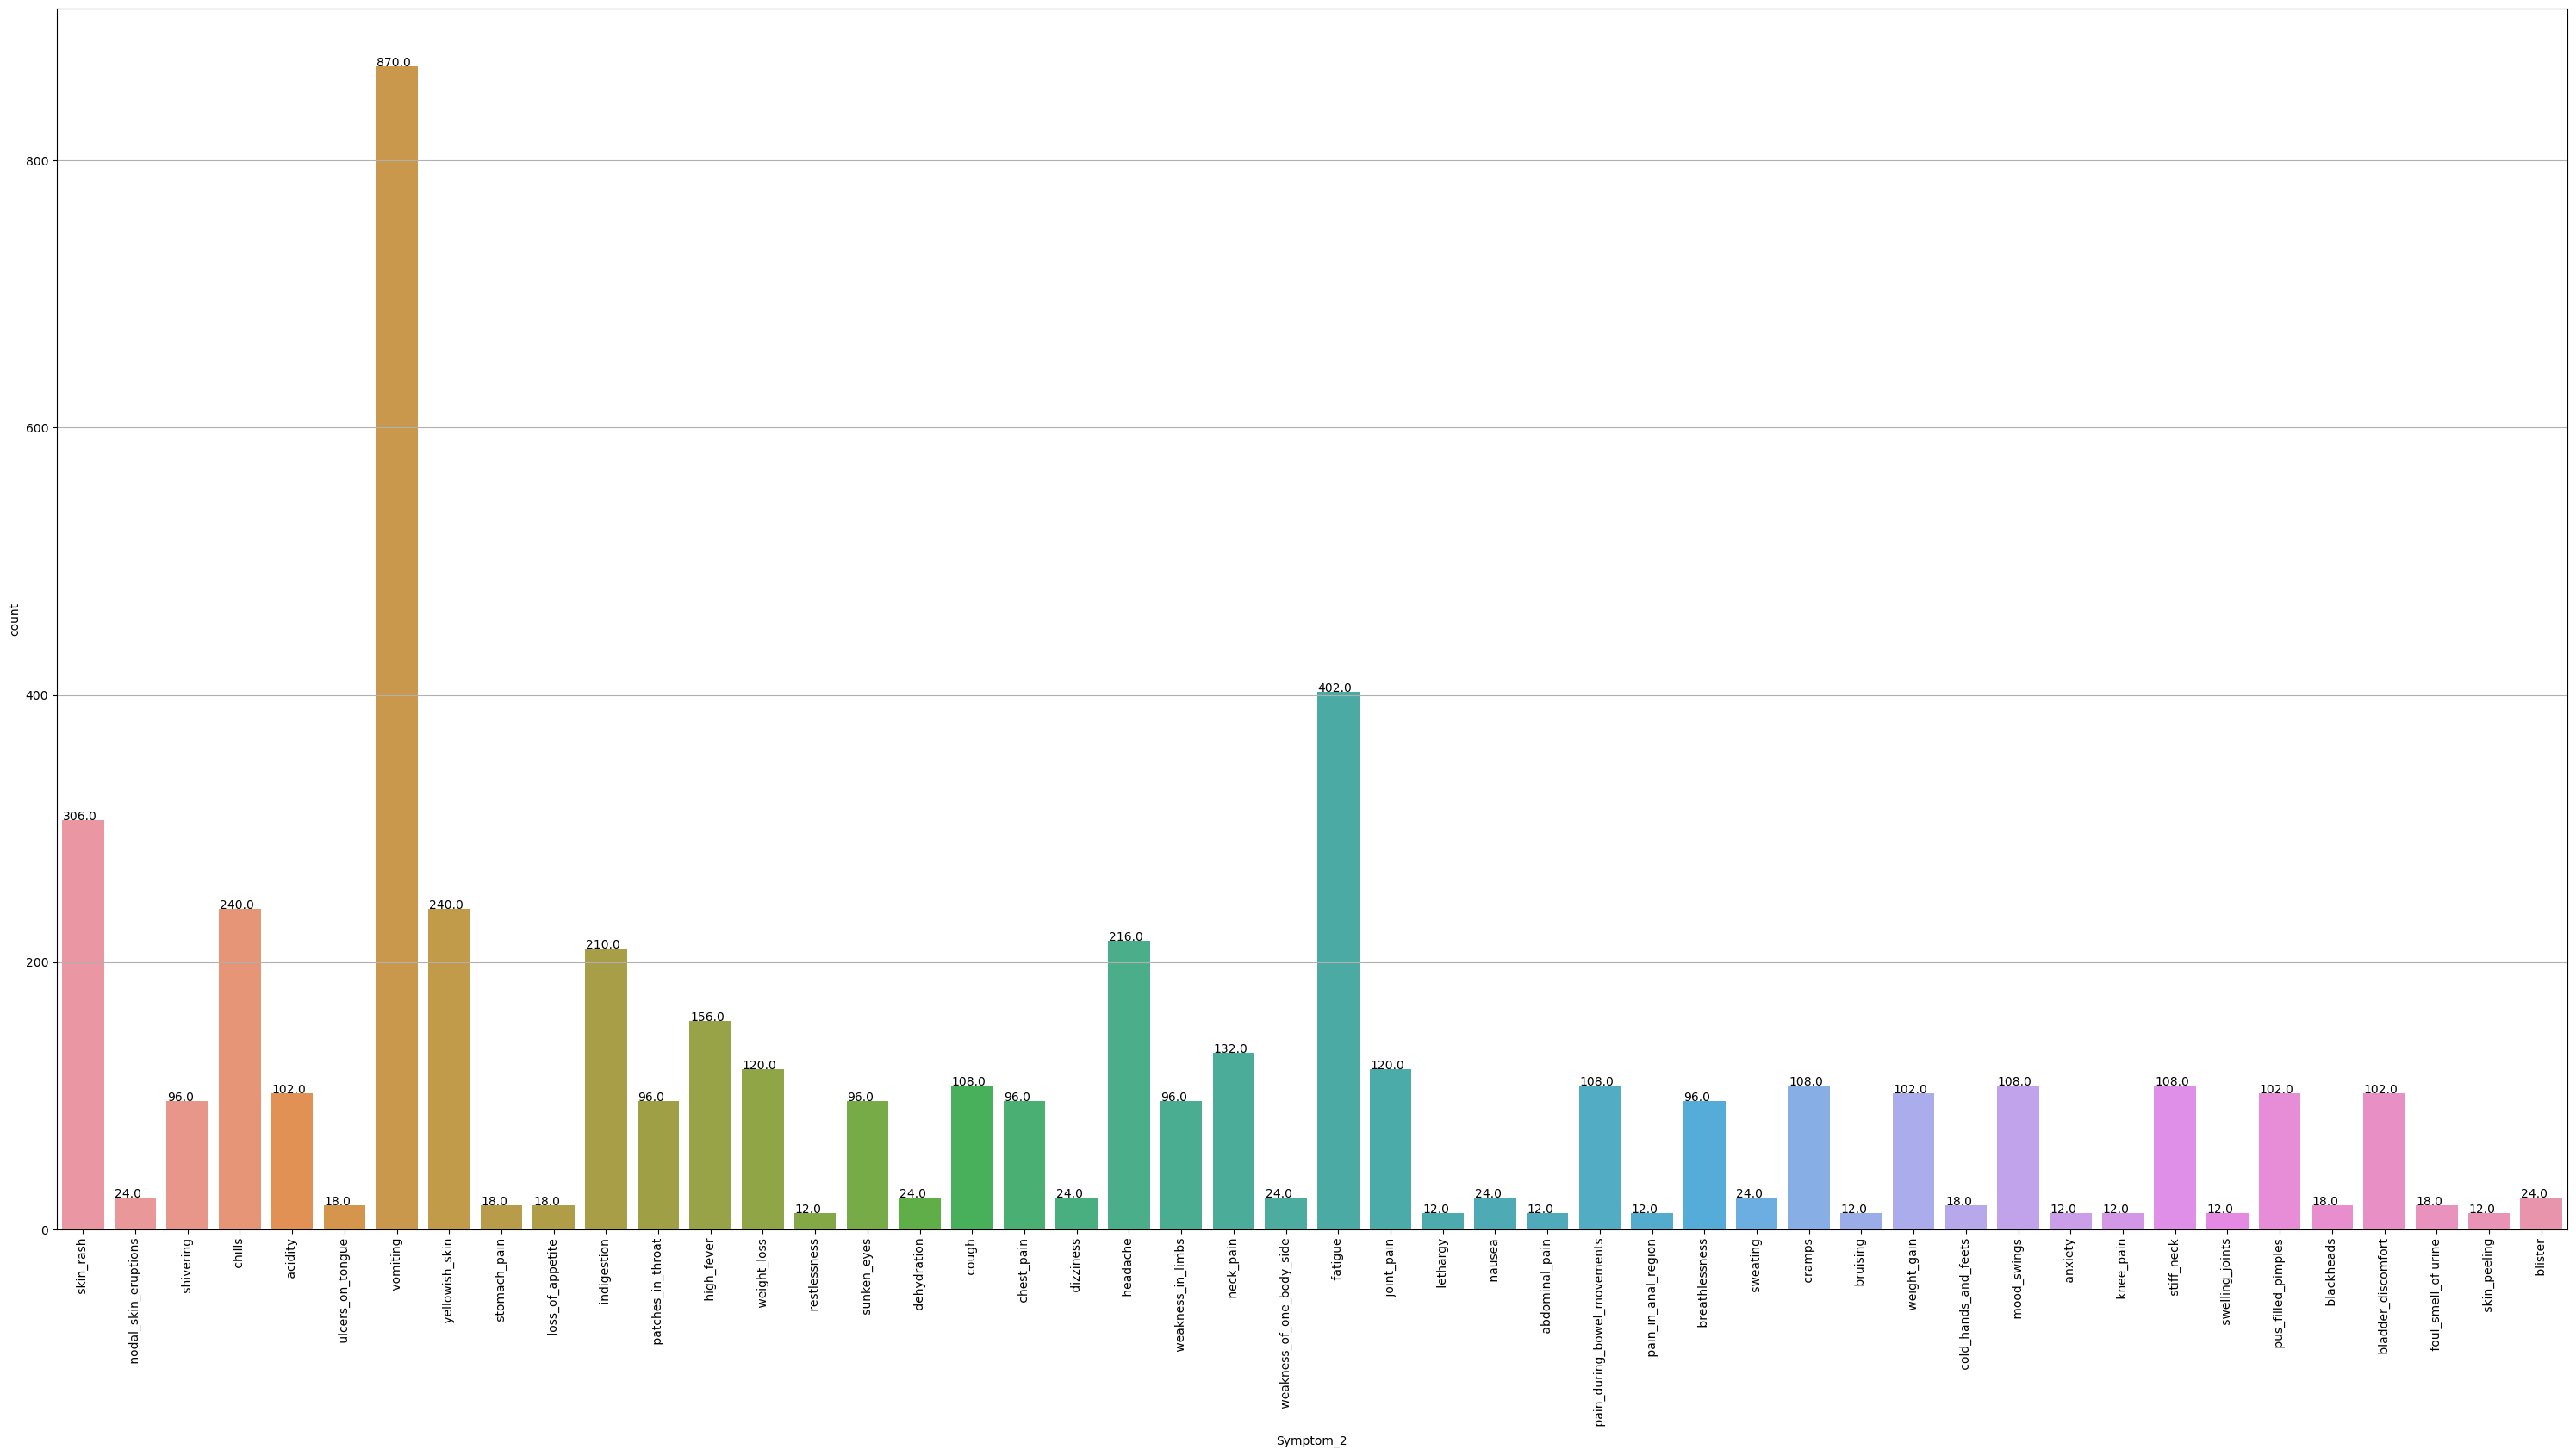

In [8]:
cnt_plot_symptom("Symptom_2")

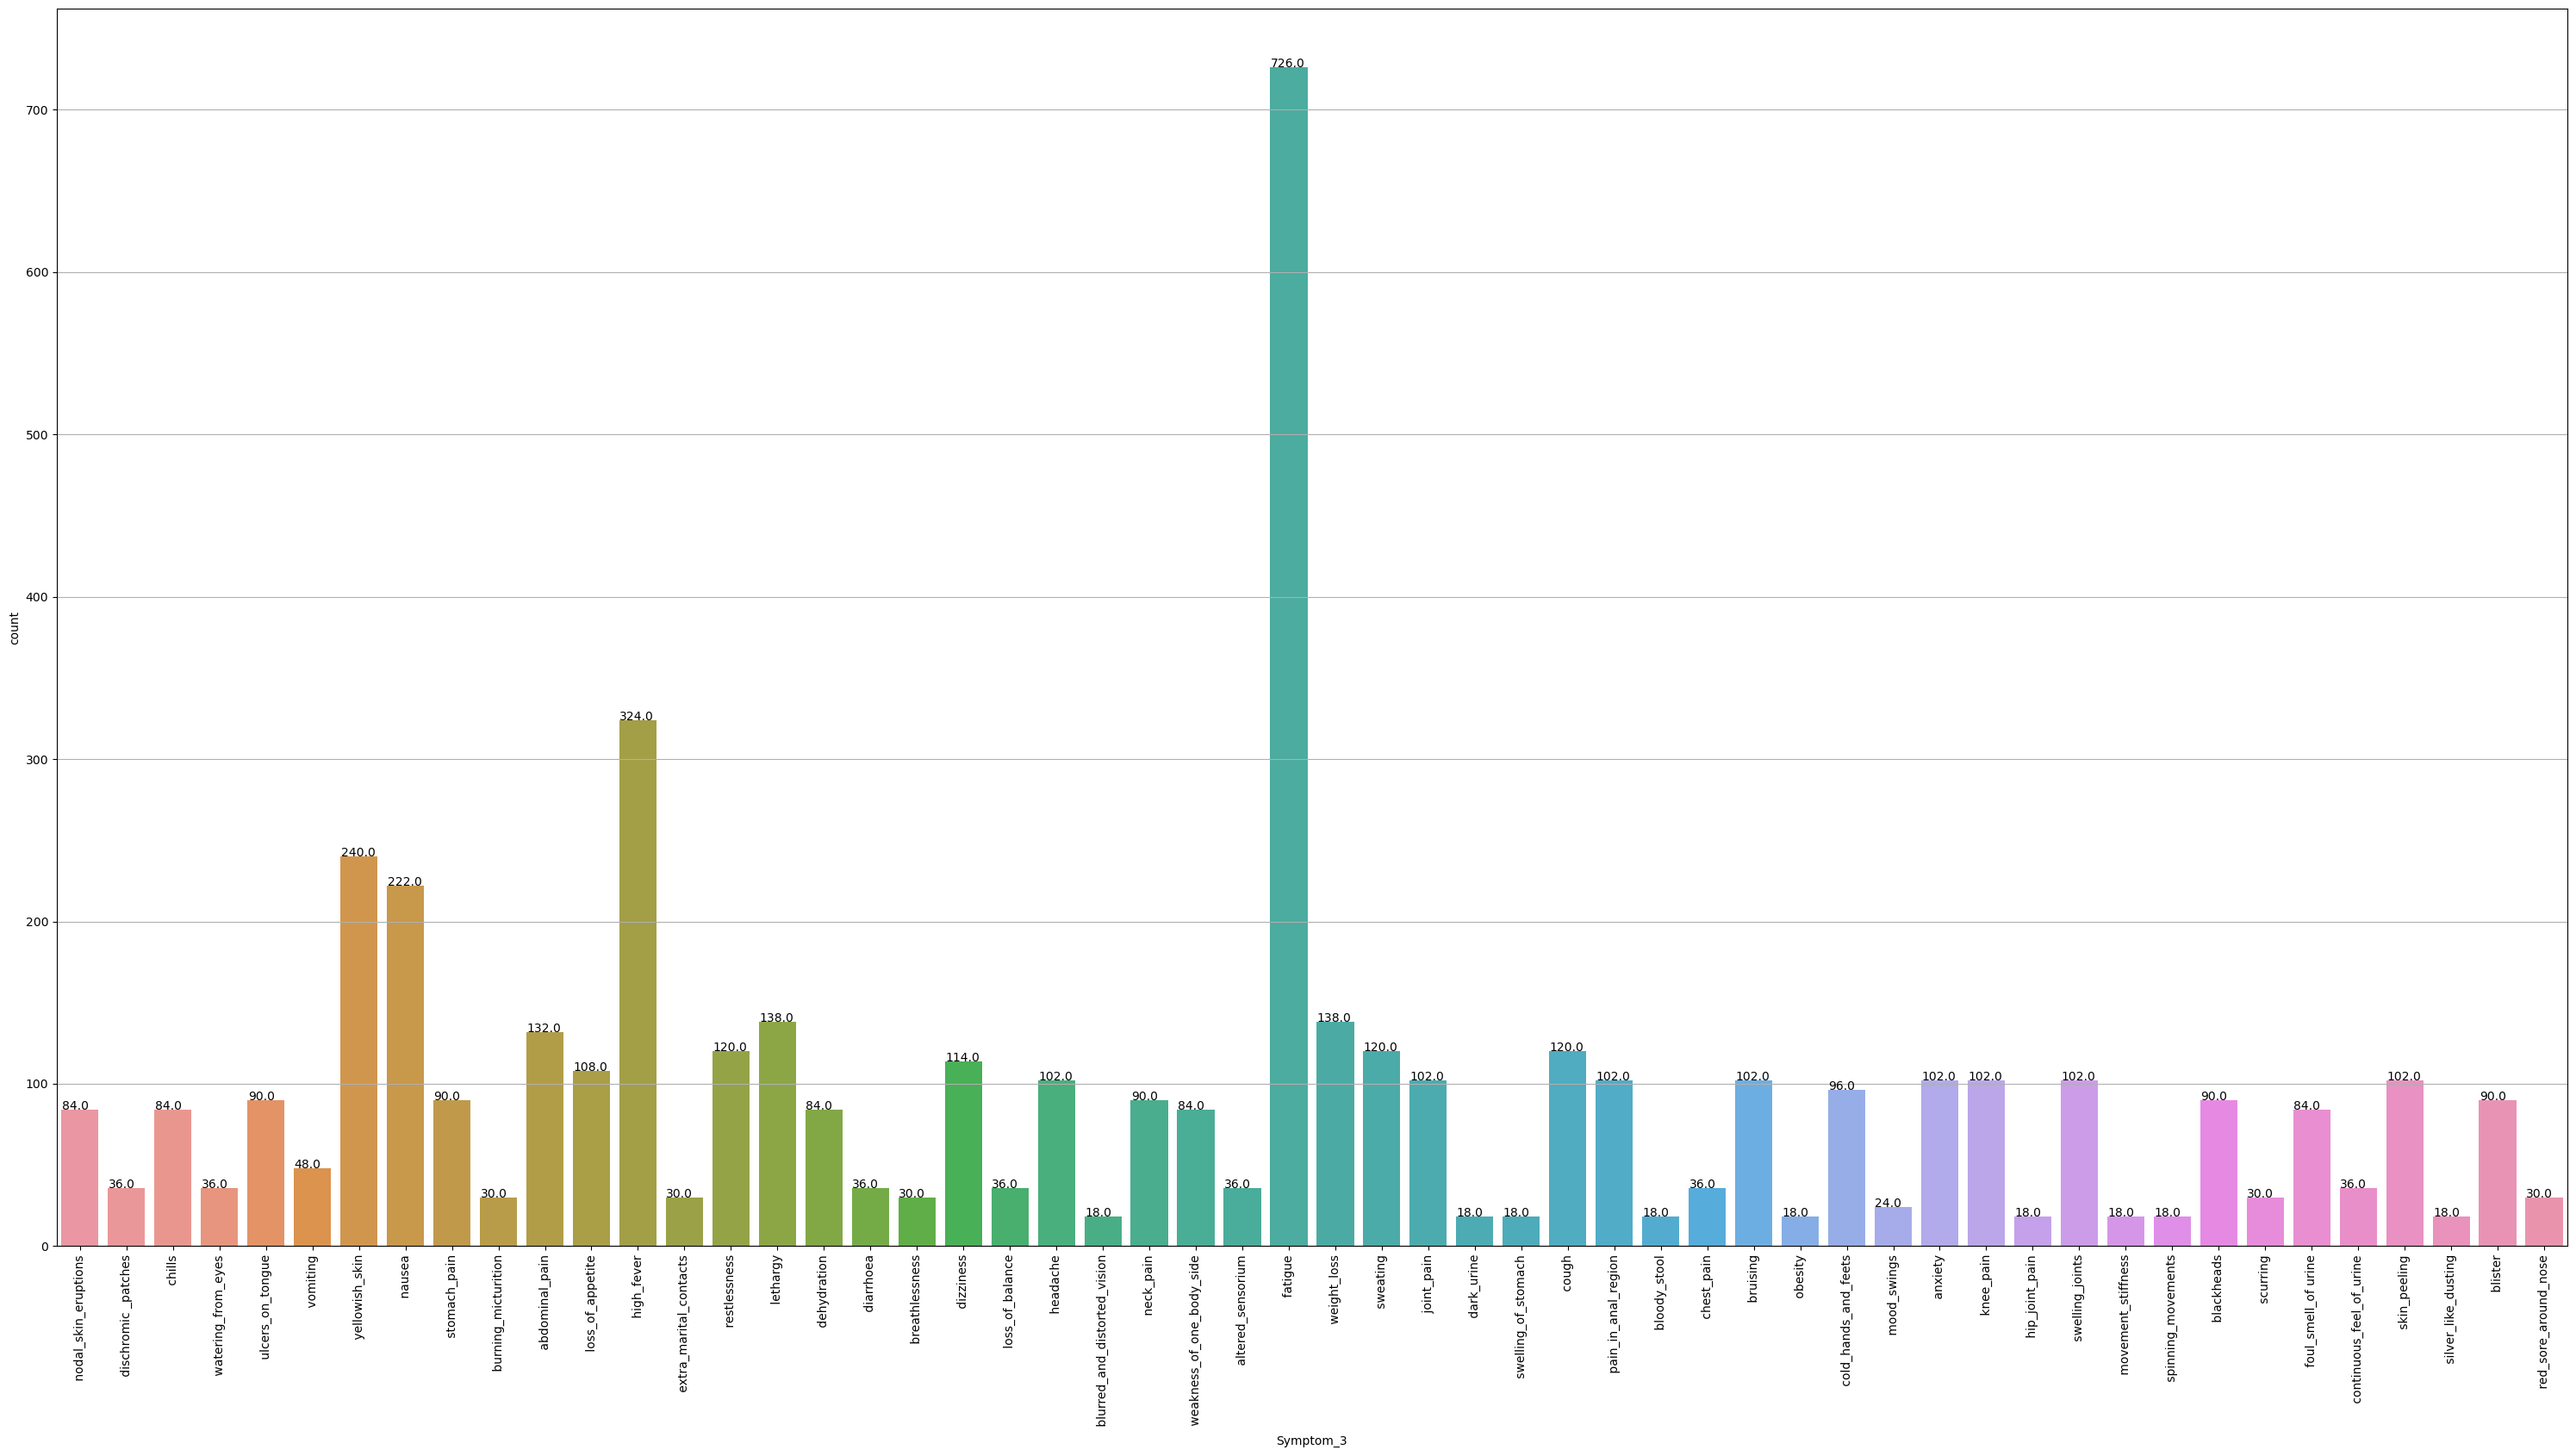

In [9]:
cnt_plot_symptom("Symptom_3")

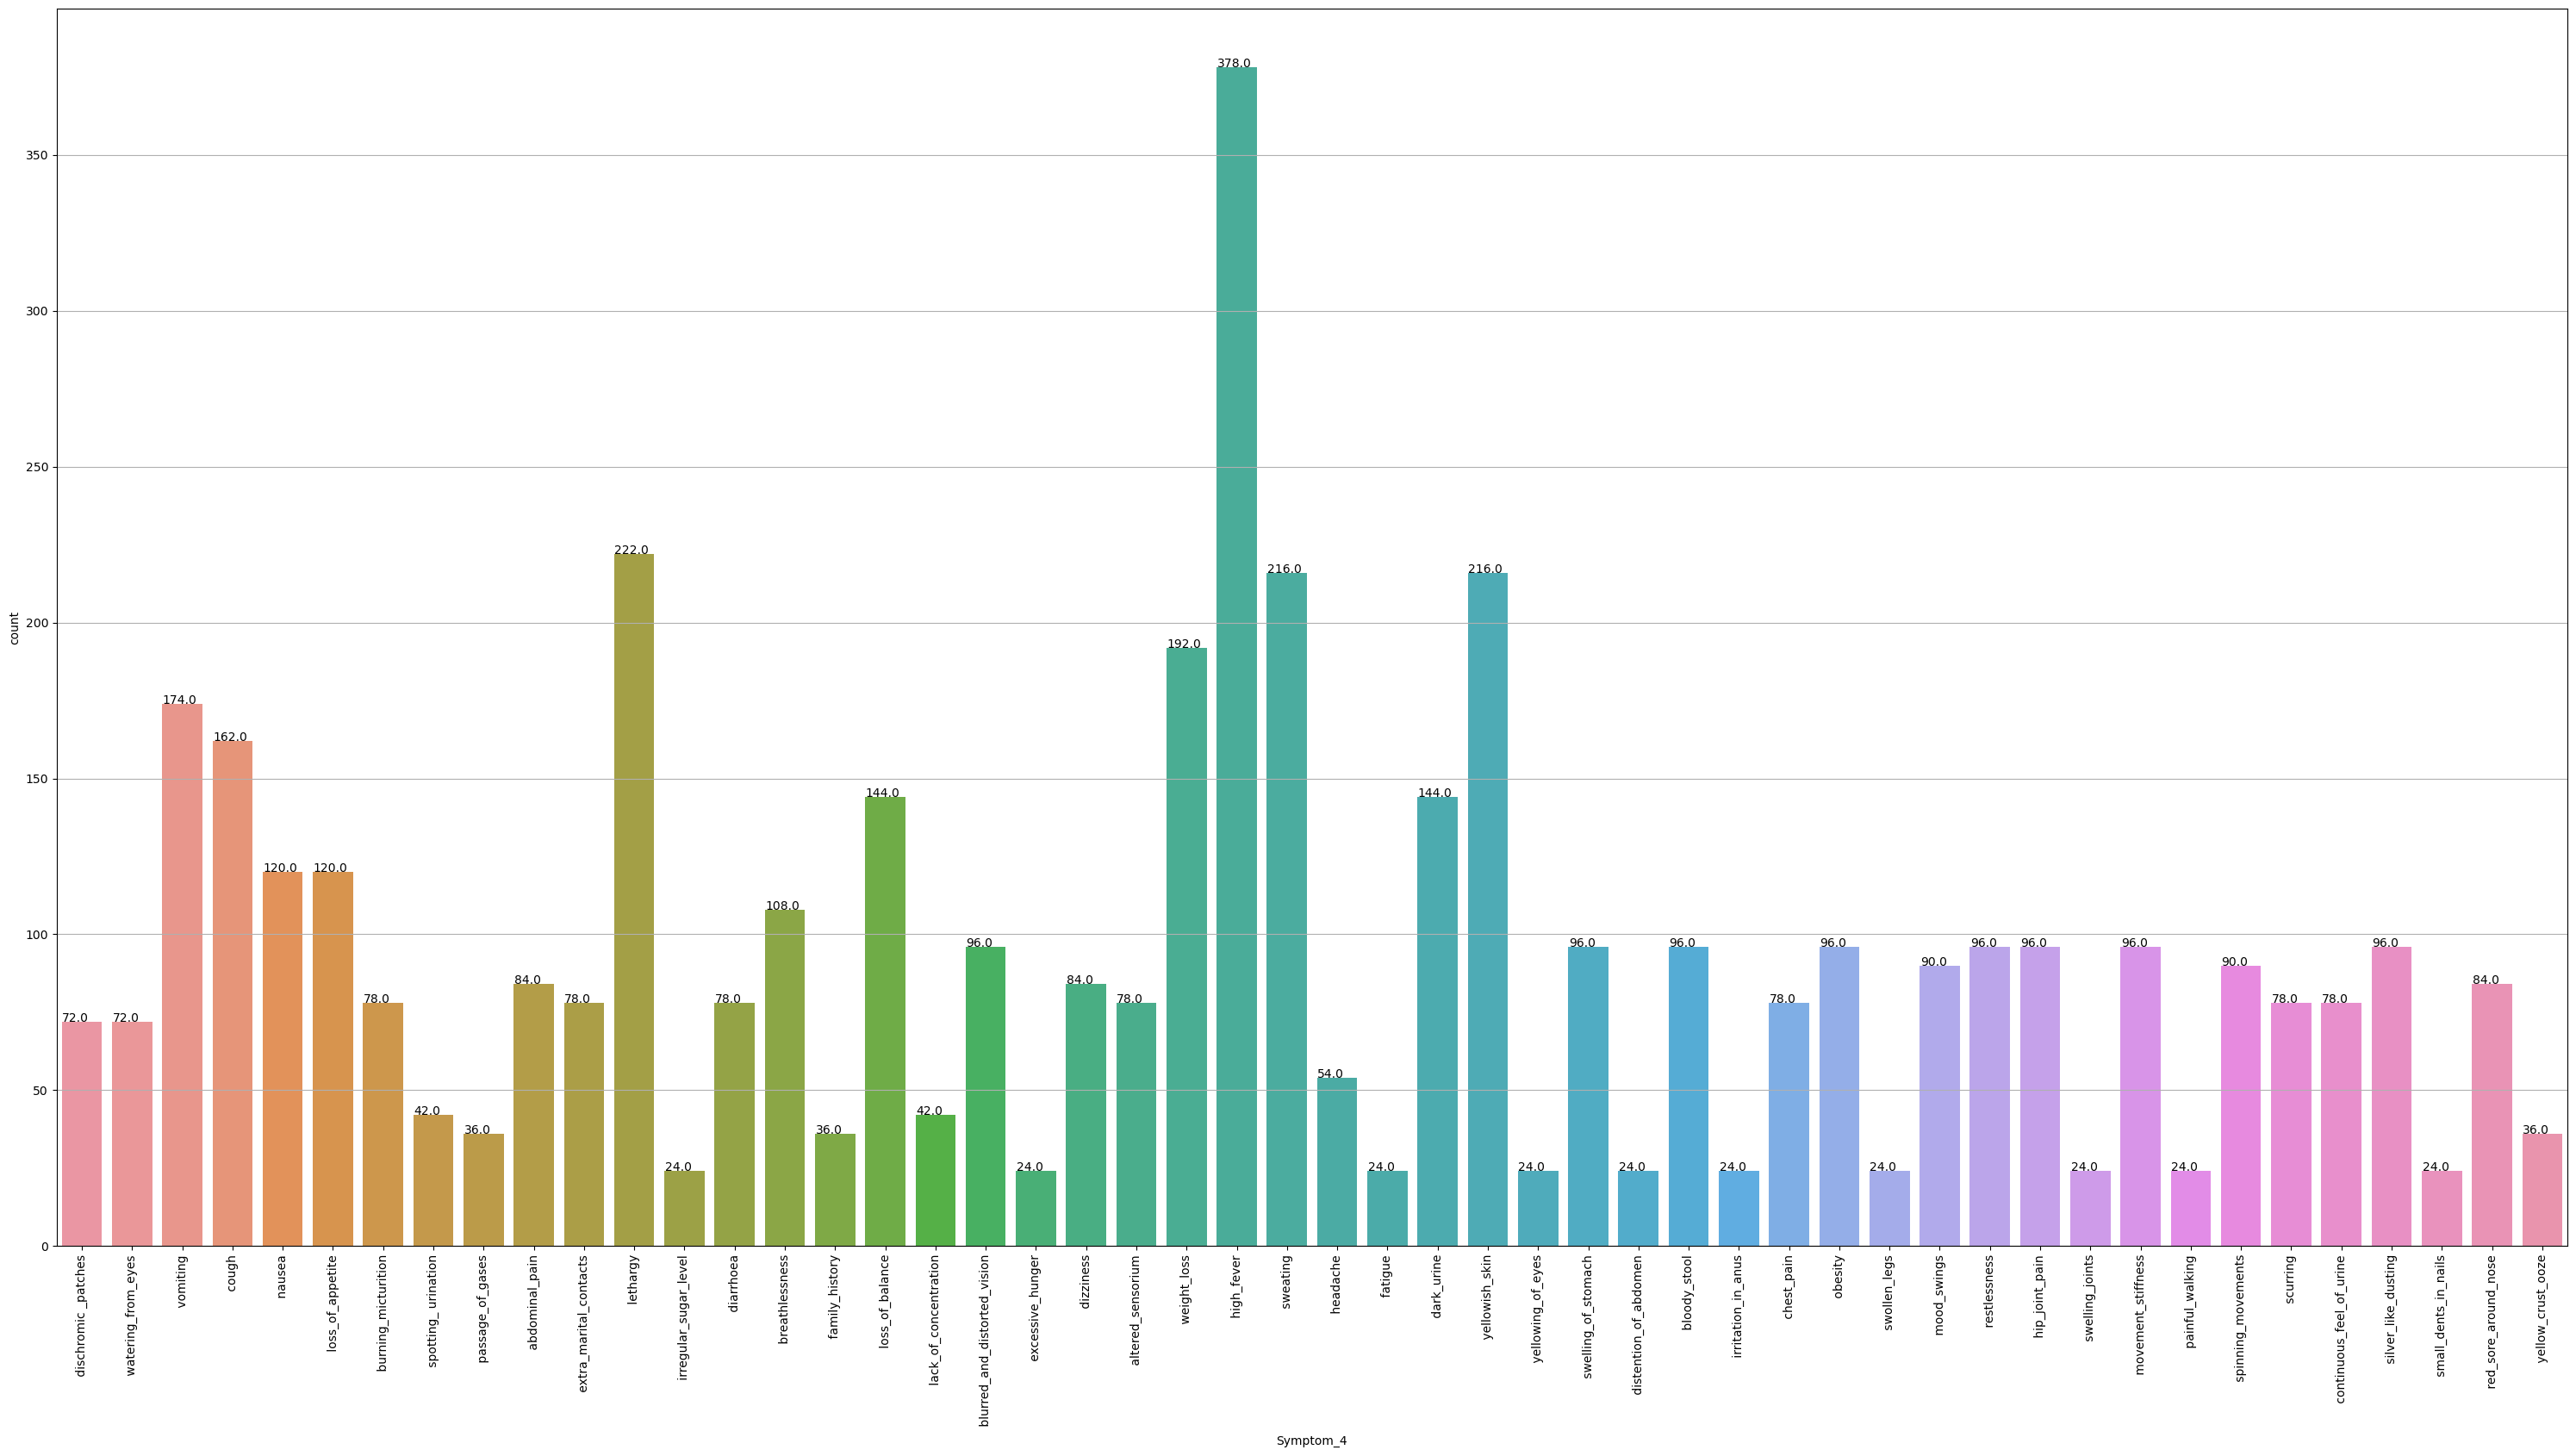

In [10]:
cnt_plot_symptom("Symptom_4")

In [11]:
# leave your comments and thoughts based on data

### symptom description (s_des)

In [12]:
# symptom description
s_des.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [13]:
s_des.isnull().sum()

Disease        0
Description    0
dtype: int64

In [14]:
x1=sorted(list(set(s_des['Disease'].values)))
x2=sorted(list(set(ds['Disease'].values)))

for i in range(len(x1)):
    if x1[i]!=x2[i]:
        print(x1[i],"=======",x2[i])

Diabetes ======= Diabetes 
Dimorphic hemorrhoids(piles) ======= Dimorphic hemmorhoids(piles)
Hypertension ======= Hypertension 


s_des diseases are all the same as main dataset diseases , 
but these 3 are different which is simple miss typing for 1 and extra space for 2 (which can be handled by strip()).

In [15]:
# correcting the spelling mistake
s_des.replace({'Dimorphic hemorrhoids(piles)': "Dimorphic hemmorhoids(piles)"},inplace=True)

### symptom precaution (s_pre)

In [16]:
# symptom precaution
s_pre.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [17]:
s_pre.isnull().sum()

Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    1
Precaution_4    1
dtype: int64

In [18]:
x1=sorted(list(set(s_pre['Disease'].values)))
x2=sorted(list(set(ds['Disease'].values)))

print(x1==x2)

True


s_pre diseases are same as main dataset diseases. for some cases p3 and p4 are not present but thats not a problem

### symptom severity (s_sev)

In [19]:
# symptom severity
s_sev.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [20]:
s_sev.isnull().sum()

Symptom    0
weight     0
dtype: int64

### can we use severity of symptom in model to predict ???

## Save data , combine all 4 files

In [21]:
ds['Disease'] = ds['Disease'].apply(lambda i: i.strip())
s_des['Disease'] = s_des['Disease'].apply(lambda i: i.strip())
s_pre['Disease'] = s_pre['Disease'].apply(lambda i: i.strip())

In [22]:
ds = ds.fillna('')
s_sev = s_sev.fillna('')
s_pre = s_pre.fillna('')
s_des = s_des.fillna('')

In [23]:
# create a final database for further processing
# combine all 4 csv
w_cnt ,char_cnt =[],[]
final_data = []

for idx,row in ds.iterrows():
    dis_name = row['Disease'].lower()
    try:
        dis_desc = str(s_des[s_des['Disease']==row['Disease']]['Description'].values[0])
    except Exception as e:
        print(idx,dis_name)
        print(str(e))
    dis_symptoms = ""
    for i in range(1,18):
        x=row['Symptom_'+str(i)]
        if len(x)>0:
            dis_symptoms += " "+ str(x).replace('_',' ').replace('  ',' ').lower()
    temp_pre = s_pre[s_pre['Disease']==row['Disease']].drop(["Disease"],axis=1).values
    dis_precaution = list(temp_pre[0])
    
    # word and char cnt in dis symptoms (main feature for model)
    w_cnt.append(len(dis_symptoms.split(' ')))
    char_cnt.append(len(dis_symptoms))
    
    final_data.append([dis_name, dis_desc, dis_symptoms, dis_precaution])

print(len(final_data))

4920


In [24]:
final_data[0]

['fungal infection',
 'In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi.',
 ' itching  skin rash  nodal skin eruptions  dischromic patches',
 ['bath twice',
  'use detol or neem in bathing water',
  'keep infected area dry',
  'use clean cloths']]

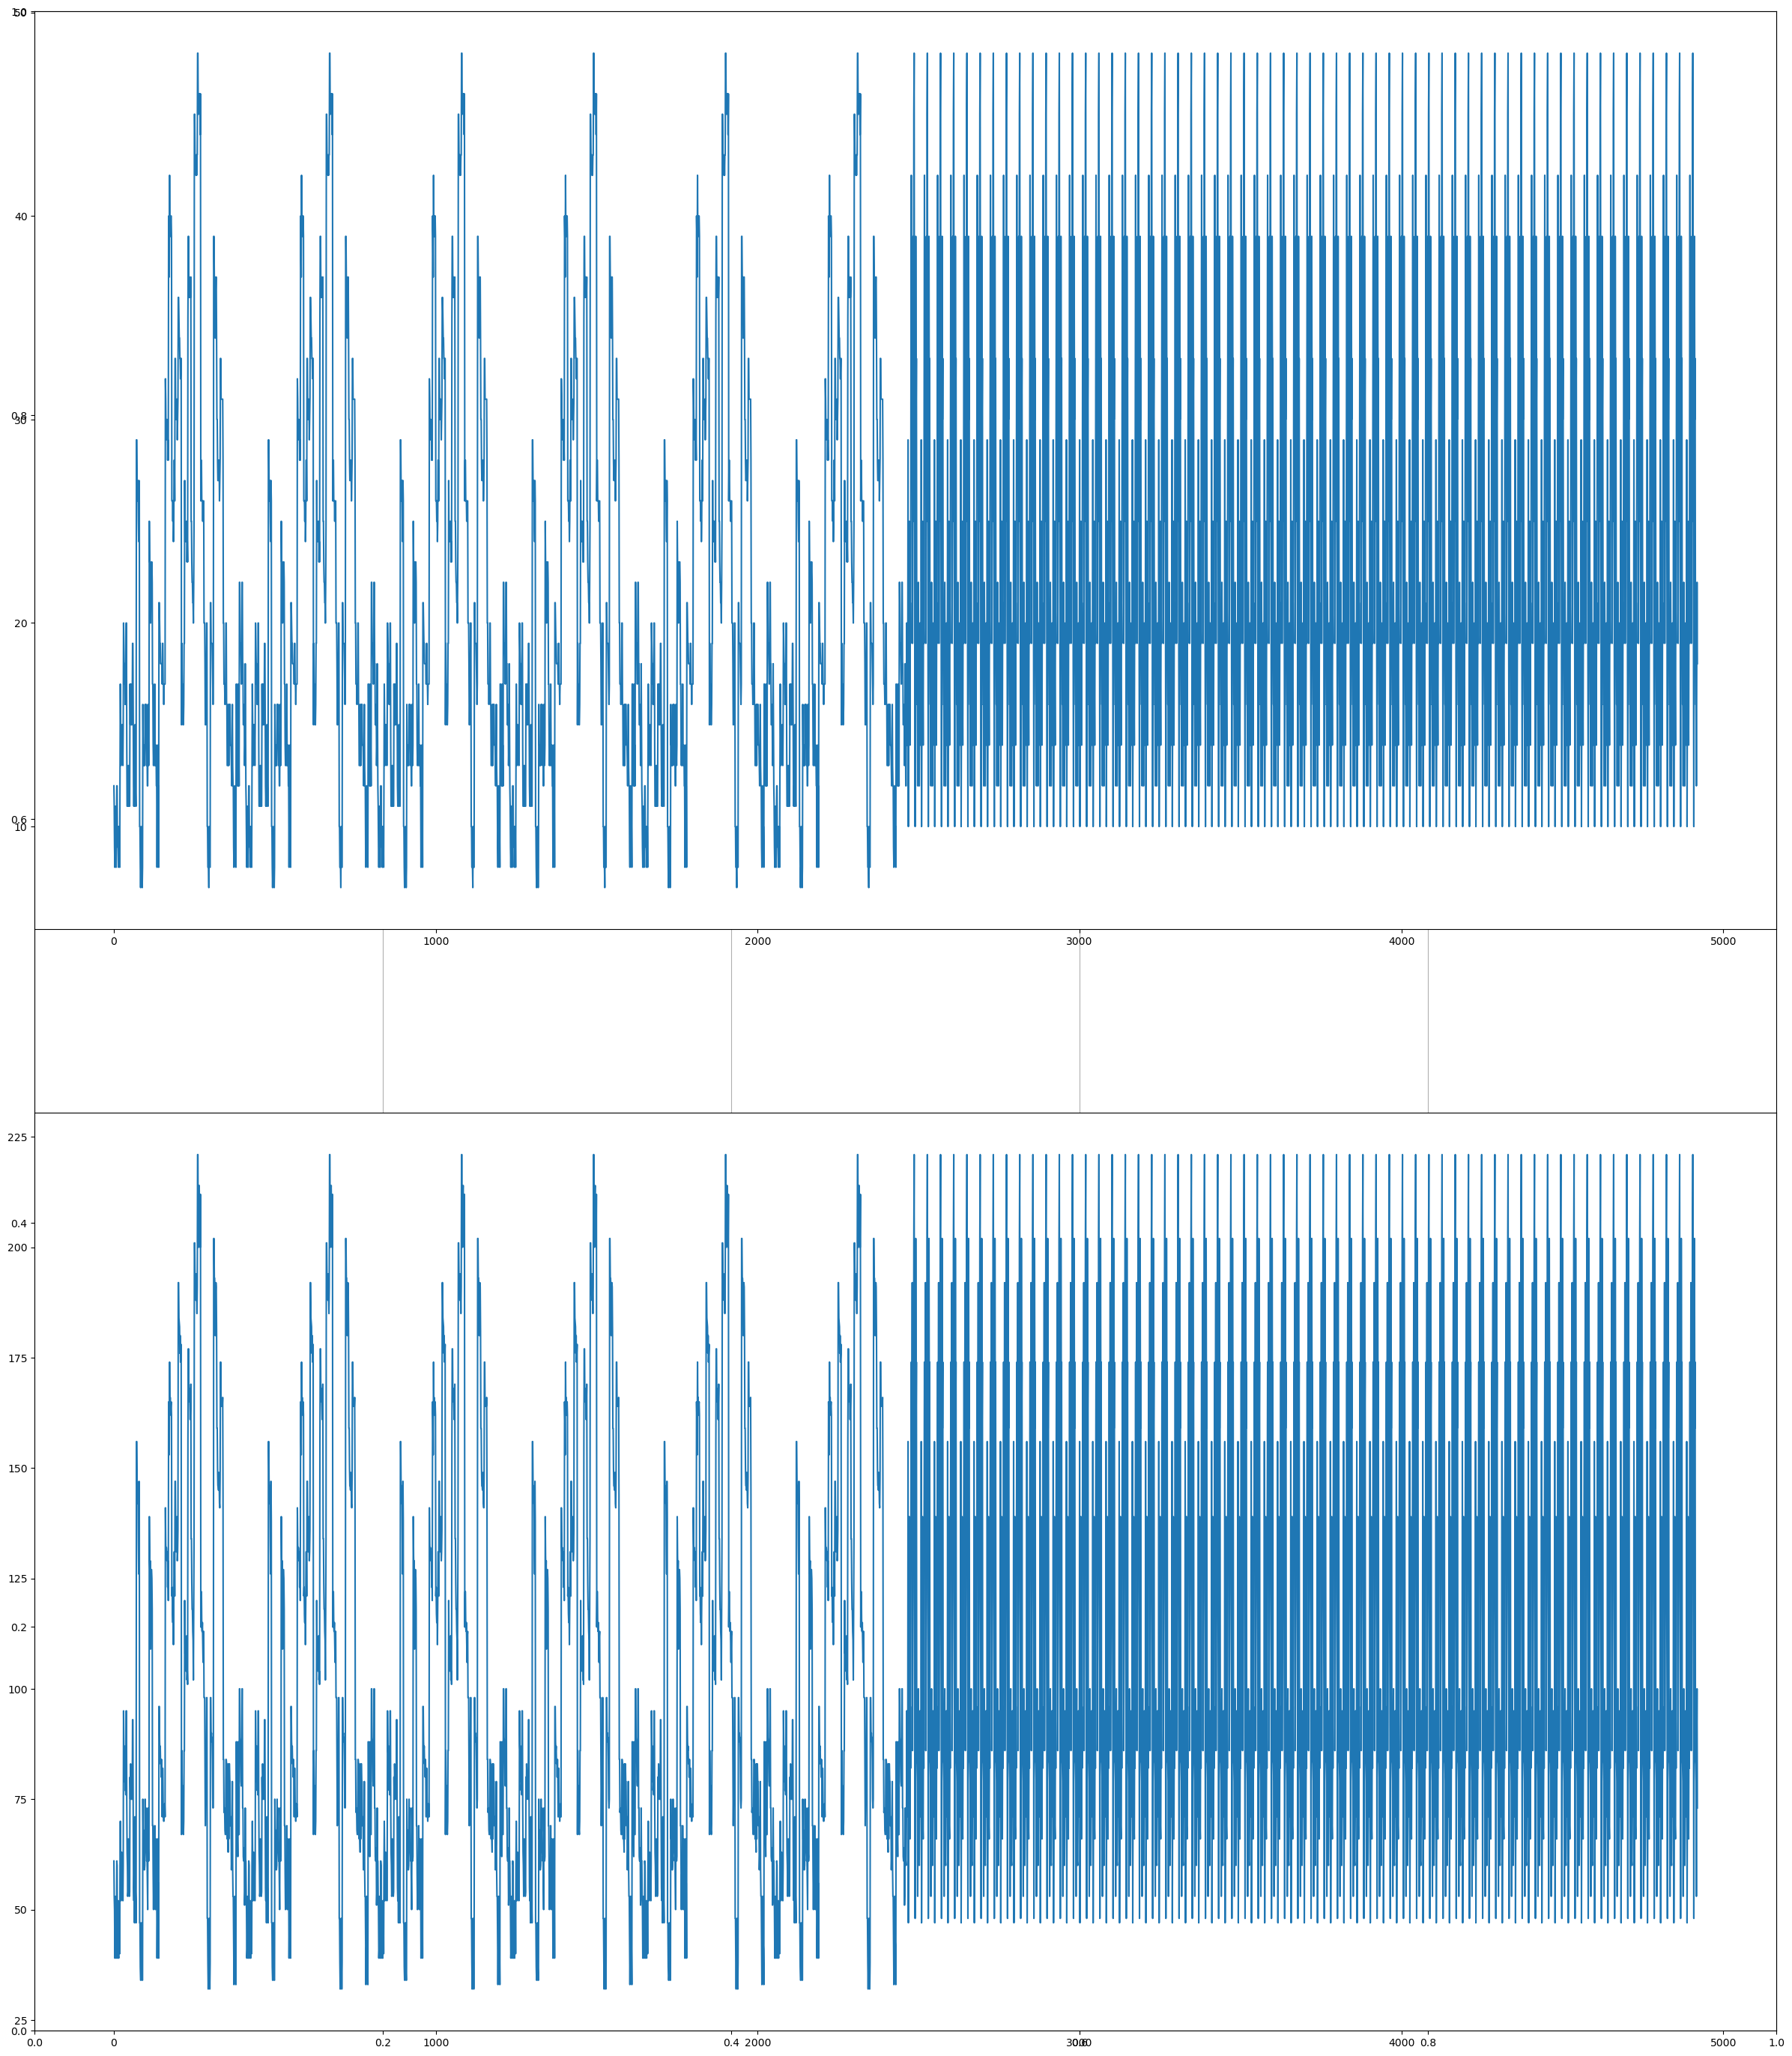

In [25]:
# visualizing word and character counts in the combined symptoms  
x_r = [i for i in range(4920)]

plt.figure(figsize=(30,35))
plt.grid(True)
plt.subplot(2,1,1)
plt.plot(x_r,w_cnt)

plt.subplot(2,1,2)
plt.plot(x_r,char_cnt)
plt.show()

In [26]:
final_df = pd.DataFrame(final_data, columns=["dis_name","dis_description","dis_symptoms","dis_precaution"])
final_df.shape

(4920, 4)

### add column for k fold

In [27]:
# from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
Y = final_df['dis_name']
for i, (_, v_ind) in enumerate(kf.split(final_df,Y)):
    final_df.loc[final_df.index[v_ind], 'kfold'] = i+1

In [28]:
print(final_df.shape)
final_df.head()

(4920, 5)


,dis_name,dis_description,dis_symptoms,dis_precaution,kfold
0,fungal infection,"In humans, fungal infections occur when an inv...",itching skin rash nodal skin eruptions dis...,"[bath twice, use detol or neem in bathing wate...",1.0
1,fungal infection,"In humans, fungal infections occur when an inv...",skin rash nodal skin eruptions dischromic ...,"[bath twice, use detol or neem in bathing wate...",5.0
2,fungal infection,"In humans, fungal infections occur when an inv...",itching nodal skin eruptions dischromic pat...,"[bath twice, use detol or neem in bathing wate...",5.0
3,fungal infection,"In humans, fungal infections occur when an inv...",itching skin rash dischromic patches,"[bath twice, use detol or neem in bathing wate...",5.0
4,fungal infection,"In humans, fungal infections occur when an inv...",itching skin rash nodal skin eruptions,"[bath twice, use detol or neem in bathing wate...",2.0


In [29]:
final_df['kfold'].value_counts()

1.0    984
5.0    984
2.0    984
3.0    984
4.0    984
Name: kfold, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(final_df['dis_name'].values)
final_df['encoded_dis_name'] = le.transform(final_df['dis_name'].values)

In [31]:
final_df.head()

,dis_name,dis_description,dis_symptoms,dis_precaution,kfold,encoded_dis_name
0,fungal infection,"In humans, fungal infections occur when an inv...",itching skin rash nodal skin eruptions dis...,"[bath twice, use detol or neem in bathing wate...",1.0,15
1,fungal infection,"In humans, fungal infections occur when an inv...",skin rash nodal skin eruptions dischromic ...,"[bath twice, use detol or neem in bathing wate...",5.0,15
2,fungal infection,"In humans, fungal infections occur when an inv...",itching nodal skin eruptions dischromic pat...,"[bath twice, use detol or neem in bathing wate...",5.0,15
3,fungal infection,"In humans, fungal infections occur when an inv...",itching skin rash dischromic patches,"[bath twice, use detol or neem in bathing wate...",5.0,15
4,fungal infection,"In humans, fungal infections occur when an inv...",itching skin rash nodal skin eruptions,"[bath twice, use detol or neem in bathing wate...",2.0,15


In [32]:
final_df['encoded_dis_name'].value_counts().shape

(41,)

In [33]:
final_df['dis_description'].value_counts().shape

(41,)

In [34]:
final_df['dis_name'].value_counts().shape

(41,)

In [35]:
final_df.isnull().sum()

dis_name            0
dis_description     0
dis_symptoms        0
dis_precaution      0
kfold               0
encoded_dis_name    0
dtype: int64

In [36]:
temp_df = final_df.copy()

In [37]:
temp_df.columns

Index(['dis_name', 'dis_description', 'dis_symptoms', 'dis_precaution',
       'kfold', 'encoded_dis_name'],
      dtype='object')

In [38]:
temp_df.drop('dis_description',axis=1,inplace=True)
temp_df.head()

,dis_name,dis_symptoms,dis_precaution,kfold,encoded_dis_name
0,fungal infection,itching skin rash nodal skin eruptions dis...,"[bath twice, use detol or neem in bathing wate...",1.0,15
1,fungal infection,skin rash nodal skin eruptions dischromic ...,"[bath twice, use detol or neem in bathing wate...",5.0,15
2,fungal infection,itching nodal skin eruptions dischromic pat...,"[bath twice, use detol or neem in bathing wate...",5.0,15
3,fungal infection,itching skin rash dischromic patches,"[bath twice, use detol or neem in bathing wate...",5.0,15
4,fungal infection,itching skin rash nodal skin eruptions,"[bath twice, use detol or neem in bathing wate...",2.0,15


In [39]:
temp_df.drop_duplicates(subset=['dis_name'],inplace=True)
temp_df = temp_df.reset_index()
print(temp_df.columns)
temp_df.drop('index',axis=1,inplace=True)
temp_df

Index(['index', 'dis_name', 'dis_symptoms', 'dis_precaution', 'kfold',
       'encoded_dis_name'],
      dtype='object')


,dis_name,dis_symptoms,dis_precaution,kfold,encoded_dis_name
0,fungal infection,itching skin rash nodal skin eruptions dis...,"[bath twice, use detol or neem in bathing wate...",1.0,15
1,allergy,continuous sneezing shivering chills wate...,"[apply calamine, cover area with bandage, , us...",3.0,4
2,gerd,stomach pain acidity ulcers on tongue vom...,"[avoid fatty spicy food, avoid lying down afte...",5.0,17
3,chronic cholestasis,itching vomiting yellowish skin nausea lo...,"[cold baths, anti itch medicine, consult docto...",5.0,9
4,drug reaction,itching skin rash stomach pain burning mic...,"[stop irritation, consult nearest hospital, st...",4.0,14
5,peptic ulcer diseae,vomiting loss of appetite abdominal pain ...,"[avoid fatty spicy food, consume probiotic foo...",4.0,34
6,aids,muscle wasting patches in throat high feve...,"[avoid open cuts, wear ppe if possible, consul...",1.0,2
7,diabetes,fatigue weight loss restlessness lethargy...,"[have balanced diet, exercise, consult doctor,...",4.0,12
8,gastroenteritis,vomiting sunken eyes dehydration diarrhoea,"[stop eating solid food for while, try taking ...",1.0,16
9,bronchial asthma,fatigue cough high fever breathlessness ...,"[switch to loose cloothing, take deep breaths,...",3.0,6


In [40]:
final_df.to_csv('./../data/final_dataset_all.csv',index=False)
temp_df.to_csv('./../data/unique_diseases_info.csv',index=False)

In [41]:
# save label encoder
import numpy as np
np.save('./../label_enc_classes.npy', le.classes_)

In [42]:
# encoder = LabelEncoder()
# encoder.classes_ = numpy.load('classes.npy')
# # Now you should be able to use encoder
# # as you would do after `fit`

### End of Notebook